# Playground Series - Season 3, Episode 6

**Dataset Description**

The dataset (both train and test) was generated from a deep learning model trained on the Paris Housing Price Prediction. Feature distributions are close to, but not exactly the same, as the original.

**Files**

* **train.csv** - the training dataset; price is the target
* **test.csv** - the test dataset; your objective is to predict price
* **sample_submission.csv** - a sample submission file in the correct format

**Description**

* **squareMeters**
* **numberOfRooms**
* **hasYard**
* **hasPool**
* **floors** - number of floors
* **cityCode** - zip code
* **cityPartRange** - the higher the range, the more exclusive the neighbourhood is
* **numPrevOwners** - number of prevoious owners
* **made** - year
* **isNewBuilt**
* **hasStormProtector**
* **basement** - basement square meters
* **attic** - attic square meteres
* **garage** - garage size
* **hasStorageRoom**
* **hasGuestRoom** - number of guest rooms
* **price** - predicted value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from pathlib import Path

## Functions

In [2]:
# функция для преобразования названий столбцов из CamelCase в snake_case
def camel_to_snake(data):
    col = []
    for row in data.columns:
        index = [i for i, c in enumerate(row) if c.isupper()]
        count = -1
        y=0
        for i in index:
            if (i!=0) and (i!=y):
                count += 1
                row = row[:i+count] + '_' + row[i+count:]
            y=i+1
        col.append(row.lower())
    return col

In [82]:
# функция для описательной статистики
def column_stat(data, column):

    title = [x for x in globals() if globals()[x] is data][0] + ' data'
    display(title)
    display(data[column].describe())
    
    fig, ax =plt.subplots(1,2)

    sns.histplot(data=data, x=column, ax=ax[0]).set(title=title)

    sns.boxplot(data=data, x=column, ax=ax[1]).set(title=title)
    fig.set_size_inches(14,4)
    return


In [4]:
# функция для бинарных колонок
def bool_col(data, column):
    t = [x for x in globals() if globals()[x] is data][0]
    print(f'Доля True в {t}: {round(data[column].mean(), 2)}')

## Загрузка данных

In [5]:
def open_file(name):
    try:
        return pd.read_csv(
            Path('C:/Users/Счастливый/Desktop/project/playground_series_3_6/' + name)
            )
    except:
        print('Error!')

In [6]:
train = open_file('train.csv')
test = open_file('test.csv')
sample_submission = open_file('sample_submission.csv')
original = open_file('ParisHousing.csv')

In [7]:
train.head(3)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1


In [8]:
test.head(3)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2


In [9]:
sample_submission.head(3)

,id,price
0,22730,4634456.897
1,22731,4634456.897
2,22732,4634456.897


In [10]:
original.head(3)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1


In [11]:
train.columns = camel_to_snake(train)
test.columns = camel_to_snake(test)
original.columns = camel_to_snake(original)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22730 entries, 0 to 22729
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   22730 non-null  int64  
 1   square_meters        22730 non-null  int64  
 2   number_of_rooms      22730 non-null  int64  
 3   has_yard             22730 non-null  int64  
 4   has_pool             22730 non-null  int64  
 5   floors               22730 non-null  int64  
 6   city_code            22730 non-null  int64  
 7   city_part_range      22730 non-null  int64  
 8   num_prev_owners      22730 non-null  int64  
 9   made                 22730 non-null  int64  
 10  is_new_built         22730 non-null  int64  
 11  has_storm_protector  22730 non-null  int64  
 12  basement             22730 non-null  int64  
 13  attic                22730 non-null  int64  
 14  garage               22730 non-null  int64  
 15  has_storage_room     22730 non-null 

In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15154 entries, 0 to 15153
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   id                   15154 non-null  int64
 1   square_meters        15154 non-null  int64
 2   number_of_rooms      15154 non-null  int64
 3   has_yard             15154 non-null  int64
 4   has_pool             15154 non-null  int64
 5   floors               15154 non-null  int64
 6   city_code            15154 non-null  int64
 7   city_part_range      15154 non-null  int64
 8   num_prev_owners      15154 non-null  int64
 9   made                 15154 non-null  int64
 10  is_new_built         15154 non-null  int64
 11  has_storm_protector  15154 non-null  int64
 12  basement             15154 non-null  int64
 13  attic                15154 non-null  int64
 14  garage               15154 non-null  int64
 15  has_storage_room     15154 non-null  int64
 16  has_guest_room       1

In [14]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   square_meters        10000 non-null  int64  
 1   number_of_rooms      10000 non-null  int64  
 2   has_yard             10000 non-null  int64  
 3   has_pool             10000 non-null  int64  
 4   floors               10000 non-null  int64  
 5   city_code            10000 non-null  int64  
 6   city_part_range      10000 non-null  int64  
 7   num_prev_owners      10000 non-null  int64  
 8   made                 10000 non-null  int64  
 9   is_new_built         10000 non-null  int64  
 10  has_storm_protector  10000 non-null  int64  
 11  basement             10000 non-null  int64  
 12  attic                10000 non-null  int64  
 13  garage               10000 non-null  int64  
 14  has_storage_room     10000 non-null  int64  
 15  has_guest_room       10000 non-null  

In [15]:
train.duplicated().sum()

0

In [16]:
test.duplicated().sum()

0

In [17]:
original.duplicated().sum()

0

**Выводы:**

* Данные загружены успешно;
* Пропуски отсутствуют;
* Дубликаты отсутствуют;
* Все признаки количественные;
* Датасеты достаточного размера;
* Для удобства привели названия столбцов к snake_case формату.

## EDA

Исследуем данные. Сравним с оригиналом.

In [18]:
train.columns.tolist()

['id',
 'square_meters',
 'number_of_rooms',
 'has_yard',
 'has_pool',
 'floors',
 'city_code',
 'city_part_range',
 'num_prev_owners',
 'made',
 'is_new_built',
 'has_storm_protector',
 'basement',
 'attic',
 'garage',
 'has_storage_room',
 'has_guest_room',
 'price']

### id

In [19]:
print(f'Количество уникальных значений: {train.id.nunique()}.\nДлина таблицы: {len(train)}.')


Количество уникальных значений: 22730.
Длина таблицы: 22730.


In [20]:
len(train)

22730

In [21]:
train['id'].describe()

count    22730.000000
mean     11364.500000
std       6561.730145
min          0.000000
25%       5682.250000
50%      11364.500000
75%      17046.750000
max      22729.000000
Name: id, dtype: float64

### square_meters

'train data'

count    2.273000e+04
mean     4.658622e+04
std      4.952124e+04
min      8.900000e+01
25%      2.039275e+04
50%      4.448400e+04
75%      7.154700e+04
max      6.071330e+06
Name: square_meters, dtype: float64

'original data'

count    10000.00000
mean     49870.13120
std      28774.37535
min         89.00000
25%      25098.50000
50%      50105.50000
75%      74609.75000
max      99999.00000
Name: square_meters, dtype: float64

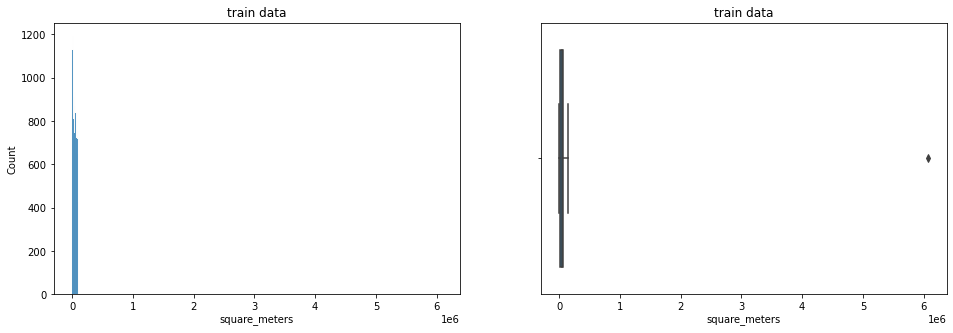

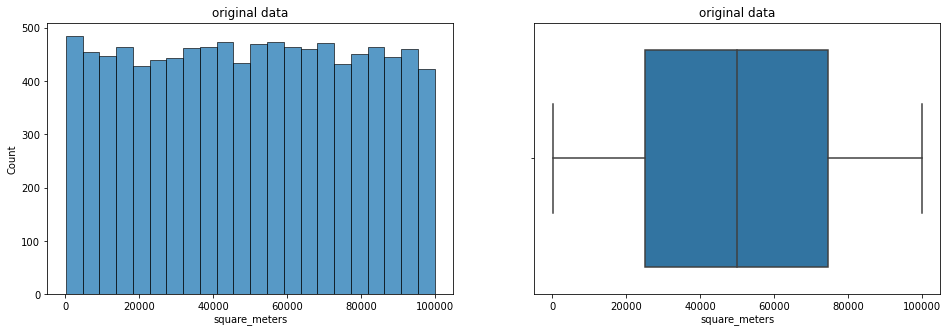

In [22]:
for data in train, original:
    column_stat(data, 'square_meters')

Есть выбросы.

Посмотрим на количество данных больще 100 000 в train.

In [23]:
len(train[train['square_meters'] > 100000])

2

Уберем выбросы из train данных.

In [36]:
train_true = train[train['square_meters'] < 100001].copy()

'x data'

count    22728.000000
mean     46316.756028
std      29239.521294
min         89.000000
25%      20392.000000
50%      44484.000000
75%      71541.000000
max      99985.000000
Name: square_meters, dtype: float64

'original data'

count    10000.00000
mean     49870.13120
std      28774.37535
min         89.00000
25%      25098.50000
50%      50105.50000
75%      74609.75000
max      99999.00000
Name: square_meters, dtype: float64

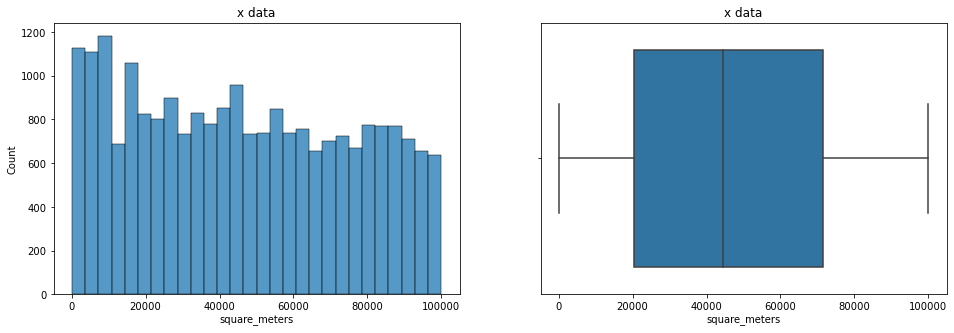

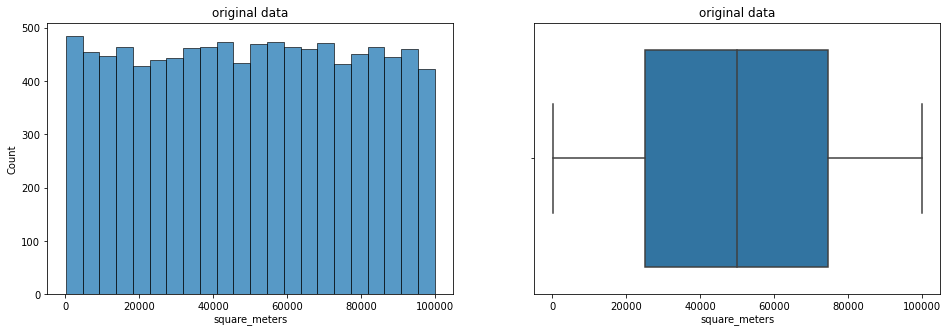

In [37]:
for data in train_true, original:
    column_stat(data, 'square_meters')

**Выводы по square_meters:**

* Удалили 2 выброса;
* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:: 
    * train: 44484/46316;
    * original: 50105.5/49870;
* max: 99999; 
* min: 89;
* original имеет равномерное распределение;
* train имеет большее количество значений до 20000, больше походит на распределение Пуассона.

### number_of_rooms

'x data'

count    22728.000000
mean        48.240848
std         28.227395
min          1.000000
25%         25.000000
50%         47.000000
75%         75.000000
max        100.000000
Name: number_of_rooms, dtype: float64

'original data'

count    10000.000000
mean        50.358400
std         28.816696
min          1.000000
25%         25.000000
50%         50.000000
75%         75.000000
max        100.000000
Name: number_of_rooms, dtype: float64

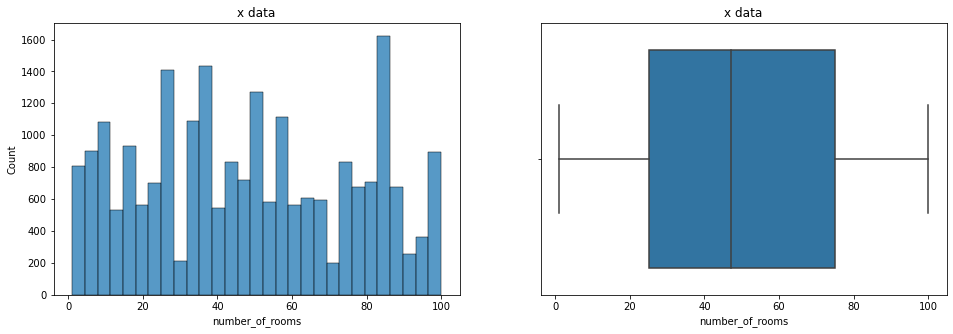

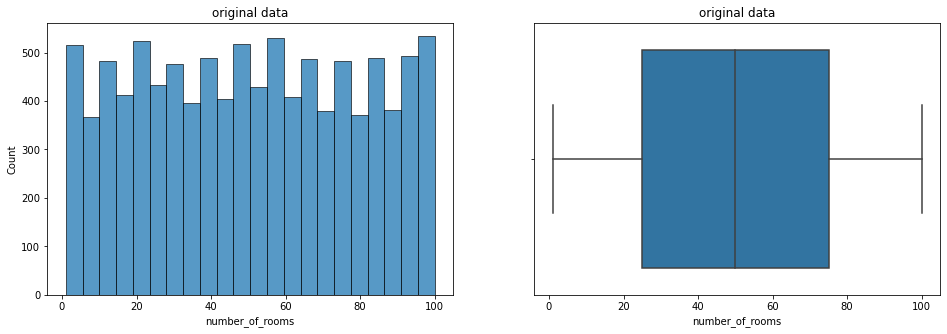

In [33]:
for data in train_true, original:
    column_stat(data, 'number_of_rooms')

**Выводы по number_of_rooms:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:
    * train: 47/48.24;
    * original: 50/50.35;
* max: 100;
* min: 1;
* original имеет равномерное распределение;
* train имеет более разнородную структуру данных.

### has_yard

In [27]:
for x in train_true, original:
    bool_col(x, column='has_yard')

Доля True в x: 0.48
Доля True в original: 0.51


**Выводы по has_yard:**

* Доля True в train_true: 0.48;
* Доля True в original: 0.51.

### has_pool

In [28]:
for x in train_true, original:
    bool_col(x, column='has_pool')

Доля True в x: 0.45
Доля True в original: 0.5


**Выводы по has_pool:**

* Доля True в train_true: 0.45;
* Доля True в original: 0.5.

### floors

'train_true data'

count    22728.000000
mean        47.306054
std         47.777722
min          1.000000
25%         25.000000
50%         45.000000
75%         69.000000
max       6000.000000
Name: floors, dtype: float64

'original data'

count    10000.000000
mean        50.276300
std         28.889171
min          1.000000
25%         25.000000
50%         50.000000
75%         76.000000
max        100.000000
Name: floors, dtype: float64

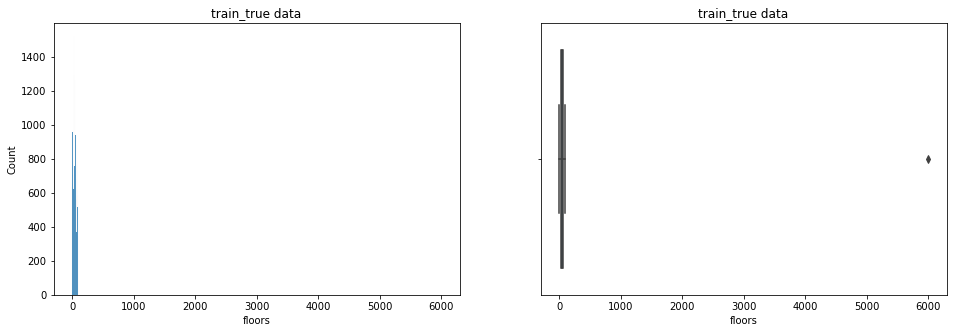

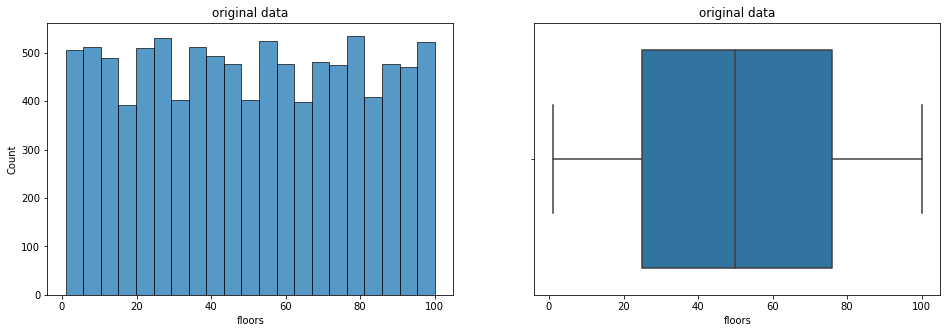

In [41]:
for data in train_true, original:
    column_stat(data, 'floors')

In [42]:
len(train_true[train_true['floors'] > 100])

1

Уберем выбросы из train данных.

In [43]:
train_true = train_true[train_true['floors'] < 101]

'train_true data'

count    22727.000000
mean        47.044133
std         26.898595
min          1.000000
25%         25.000000
50%         45.000000
75%         69.000000
max        100.000000
Name: floors, dtype: float64

'original data'

count    10000.000000
mean        50.276300
std         28.889171
min          1.000000
25%         25.000000
50%         50.000000
75%         76.000000
max        100.000000
Name: floors, dtype: float64

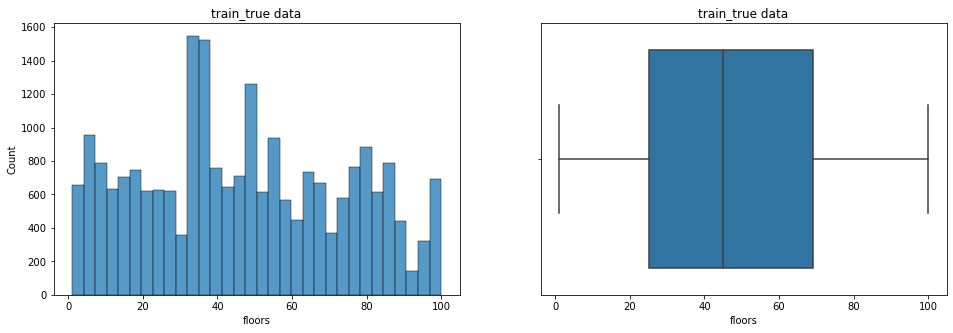

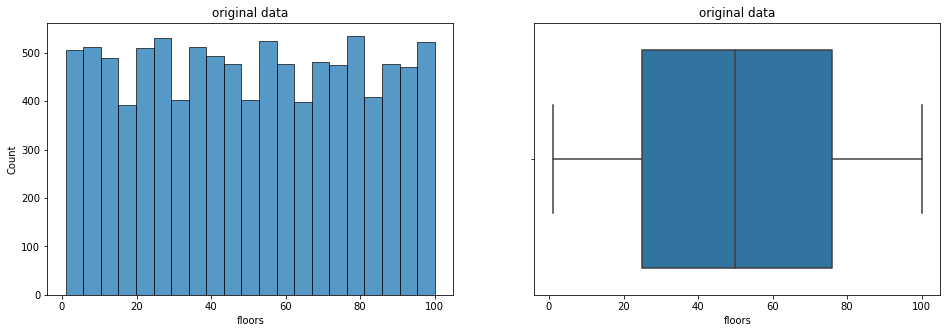

In [44]:
for data in train_true, original:
    column_stat(data, 'floors')

**Выводы по floors:**

* Удалили 1 выброс;
* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:: 
    * train: 45/47;
    * original: 50/50.3;
* max: 100; 
* min: 1;
* original имеет равномерное распределение;
* train имеет более разнородную структуру данных.

### city_code

'train_true data'

count     22727.000000
mean      50012.631540
std       30005.893316
min           3.000000
25%       22936.000000
50%       50414.000000
75%       76291.000000
max      491100.000000
Name: city_code, dtype: float64

'original data'

count    10000.000000
mean     50225.486100
std      29006.675799
min          3.000000
25%      24693.750000
50%      50693.000000
75%      75683.250000
max      99953.000000
Name: city_code, dtype: float64

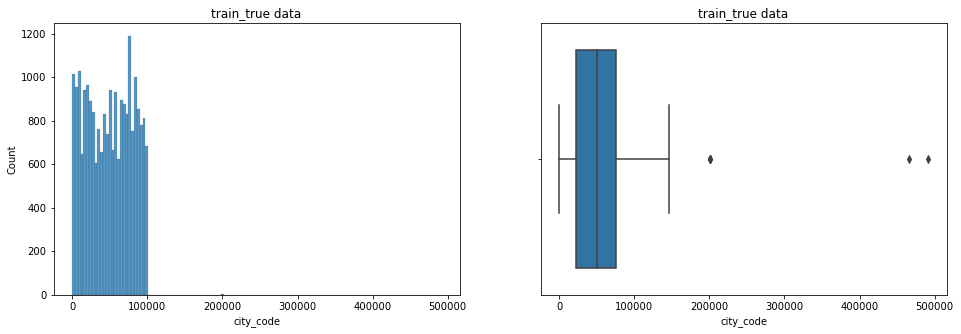

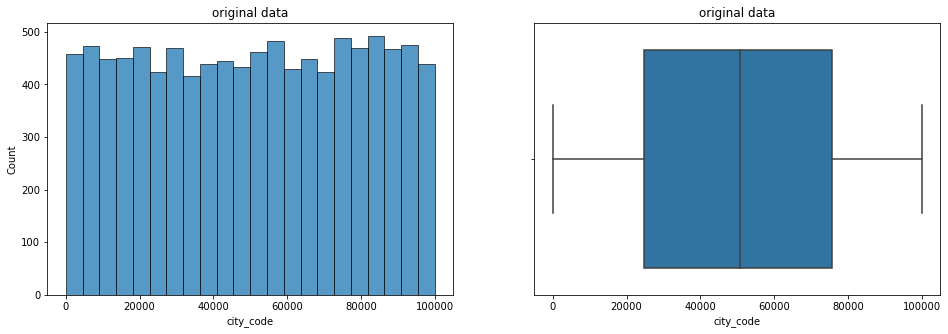

In [45]:
for data in train_true, original:
    column_stat(data, 'city_code')

In [46]:
len(train_true[train_true['city_code'] > 100000])

7

Уберем выбросы из train данных.

In [47]:
train_true = train_true[train_true['city_code'] < 100001]

'train_true data'

count    22720.000000
mean     49944.141417
std      29665.721063
min          3.000000
25%      22936.000000
50%      50409.000000
75%      76290.000000
max      99953.000000
Name: city_code, dtype: float64

'original data'

count    10000.000000
mean     50225.486100
std      29006.675799
min          3.000000
25%      24693.750000
50%      50693.000000
75%      75683.250000
max      99953.000000
Name: city_code, dtype: float64

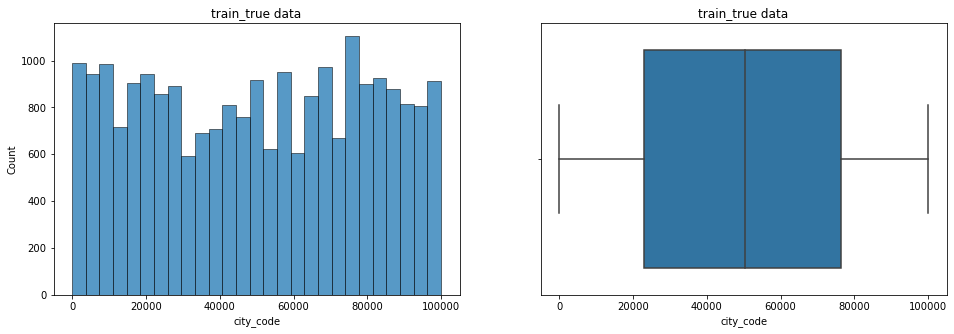

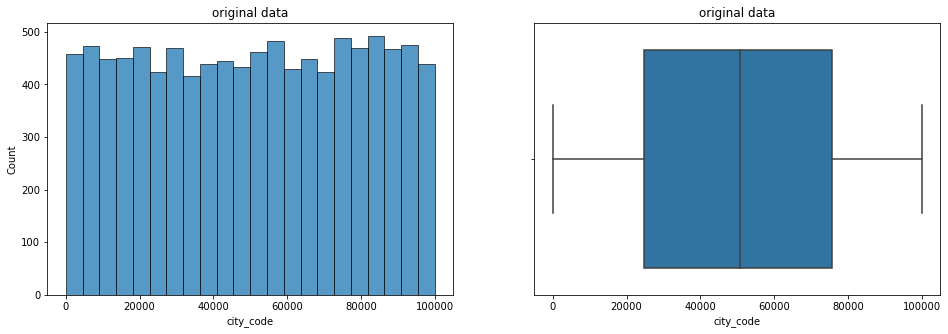

In [48]:
for data in train_true, original:
    column_stat(data, 'city_code')

**Выводы по city_code:**

* Удалили 7 выбросов;
* Датасеты приблизительно равны;
* max: 99953; 
* min: 3.

### city_part_range

'train_true data'

count    22720.000000
mean         5.584683
std          2.739871
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: city_part_range, dtype: float64

'original data'

count    10000.000000
mean         5.510100
std          2.872024
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: city_part_range, dtype: float64

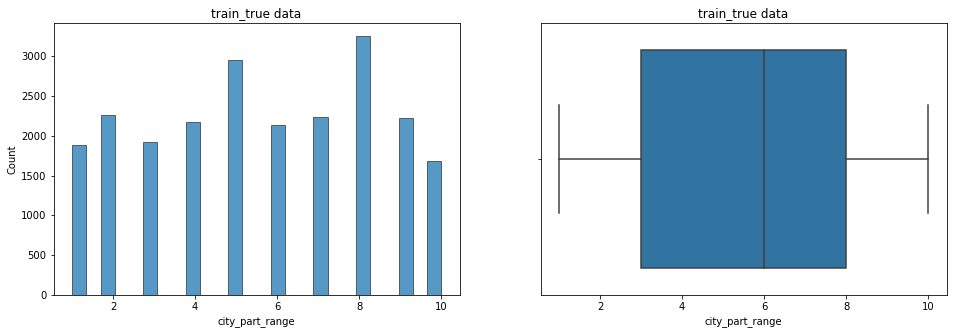

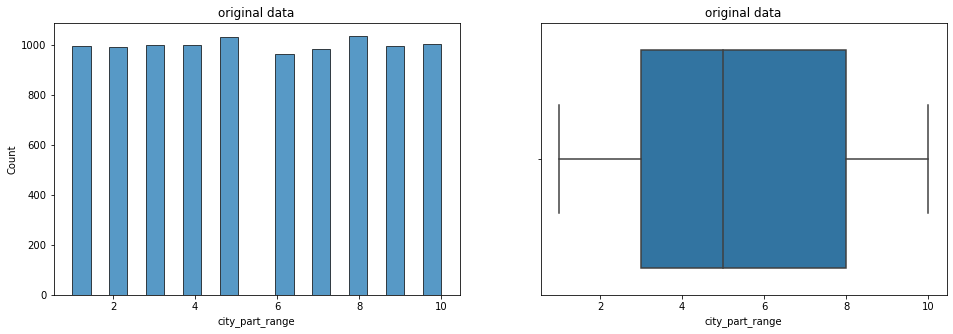

In [49]:
for data in train_true, original:
    column_stat(data, 'city_part_range')

**Выводы по city_part_range:**

* train имеет большее количество значений 5 и 8;
* original имеет равномерное распределение;
* max: 10; 
* min: 1;
* Медиана/среднее:
    * train: 6/5.6;
    * original: 5/5.5;
* train слегка скошен влево;
* original слегка скошен вправо.

### num_prev_owners

'train_true data'

count    22720.000000
mean         5.620158
std          2.713079
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: num_prev_owners, dtype: float64

'original data'

count    10000.000000
mean         5.521700
std          2.856667
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: num_prev_owners, dtype: float64

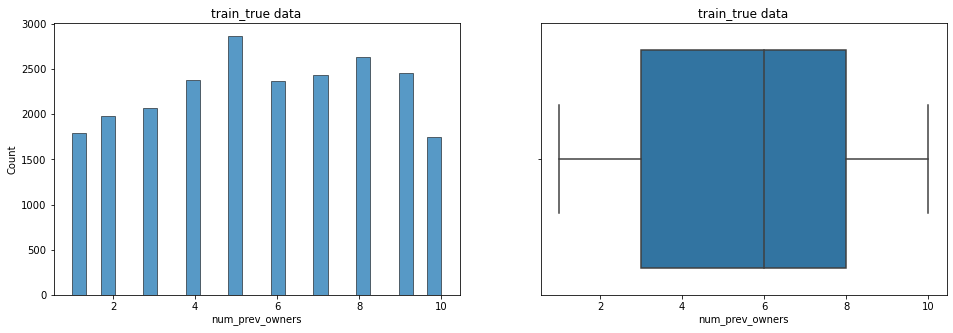

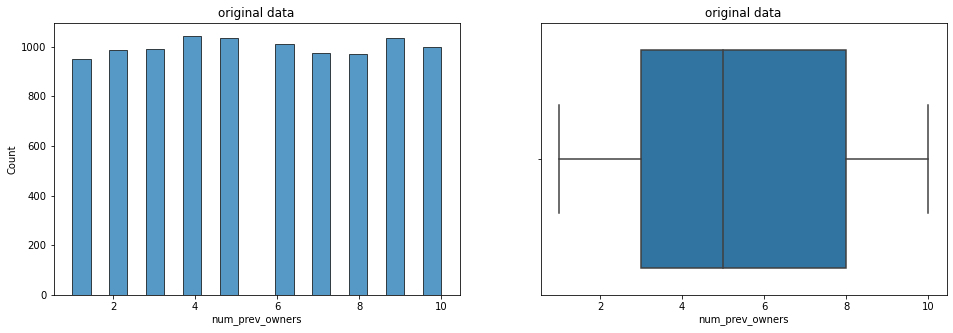

In [50]:
for data in train_true, original:
    column_stat(data, 'num_prev_owners')

**Выводы по num_prev_owners:**

* train имеет большее количество значений 5, меньшее 1 и 10;
* original имеет равномерное распределение;
* max: 10; 
* min: 1;
* Медиана:
    * train: 6;
    * original: 5.

### made

'train_true data'

count    22720.000000
mean      2008.006206
std        118.852827
min       1990.000000
25%       2000.000000
50%       2006.000000
75%       2014.000000
max      10000.000000
Name: made, dtype: float64

'original data'

count    10000.00000
mean      2005.48850
std          9.30809
min       1990.00000
25%       1997.00000
50%       2005.50000
75%       2014.00000
max       2021.00000
Name: made, dtype: float64

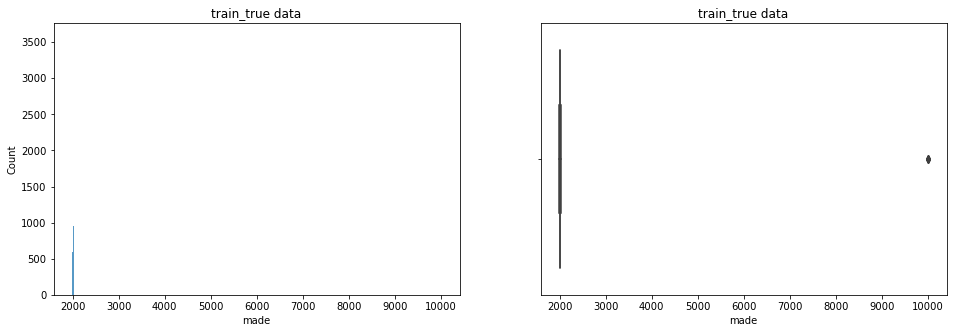

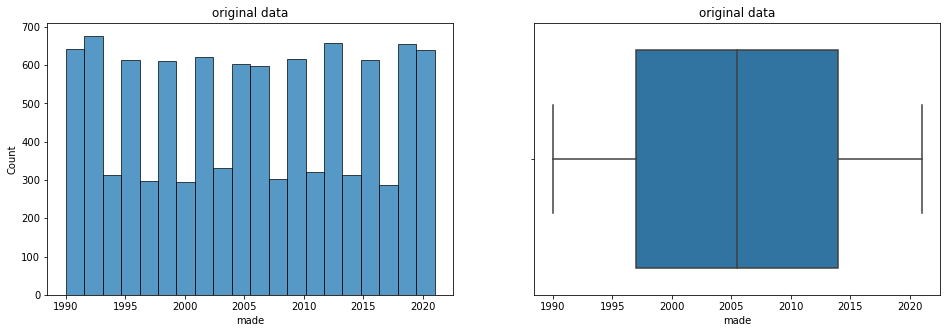

In [51]:
for data in train_true, original:
    column_stat(data, 'made')

In [52]:
len(train_true[train_true['made'] > 2021])

5

Уберем выбросы из train данных.

In [53]:
train_true = train_true[train_true['made'] < 2022]

'train_true data'

count    22715.000000
mean      2006.247017
std          8.121927
min       1990.000000
25%       2000.000000
50%       2006.000000
75%       2014.000000
max       2021.000000
Name: made, dtype: float64

'original data'

count    10000.00000
mean      2005.48850
std          9.30809
min       1990.00000
25%       1997.00000
50%       2005.50000
75%       2014.00000
max       2021.00000
Name: made, dtype: float64

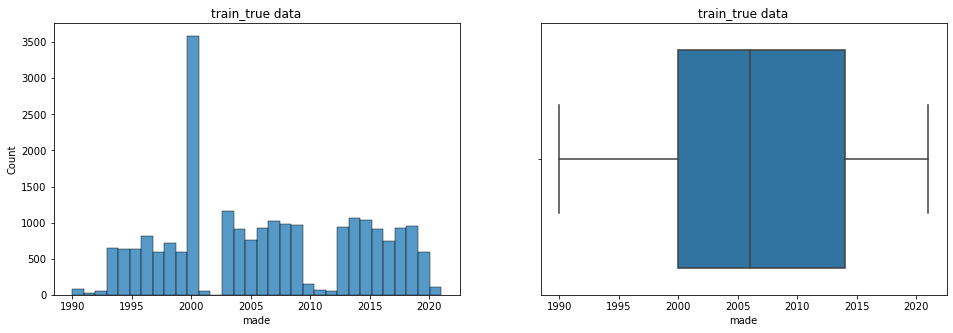

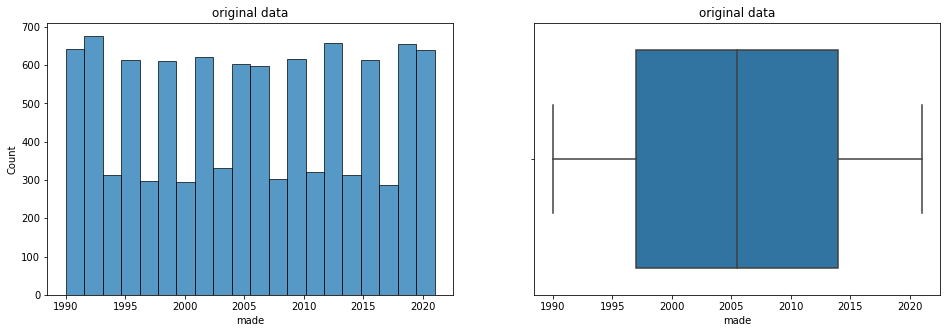

In [54]:
for data in train_true, original:
    column_stat(data, 'made')

**Выводы по made:**

* Удалили 5 выбросов;
* train имеют большее количество значений 2000;
* max: 2021; 
* min: 1990;

### is_new_built

In [74]:
for x in train_true, original:
    bool_col(x, column='is_new_built')

Доля True в x: 0.47
Доля True в original: 0.5


**Выводы по is_new_built:**

* Доля True в train_true: 0.47;
* Доля True в original: 0.5.

### has_storm_protector

In [75]:
for x in train_true, original:
    bool_col(x, column='has_storm_protector')

Доля True в x: 0.46
Доля True в original: 0.5


**Выводы по has_storm_protector:**

* Доля True в train_true: 0.46;
* Доля True в original: 0.5.

### basement

'train_true data'

count    22715.000000
mean      5282.882236
std       3047.349575
min          4.000000
25%       2976.000000
50%       5359.000000
75%       7746.000000
max      91992.000000
Name: basement, dtype: float64

'original data'

count    10000.000000
mean      5033.103900
std       2876.729545
min          0.000000
25%       2559.750000
50%       5092.500000
75%       7511.250000
max      10000.000000
Name: basement, dtype: float64

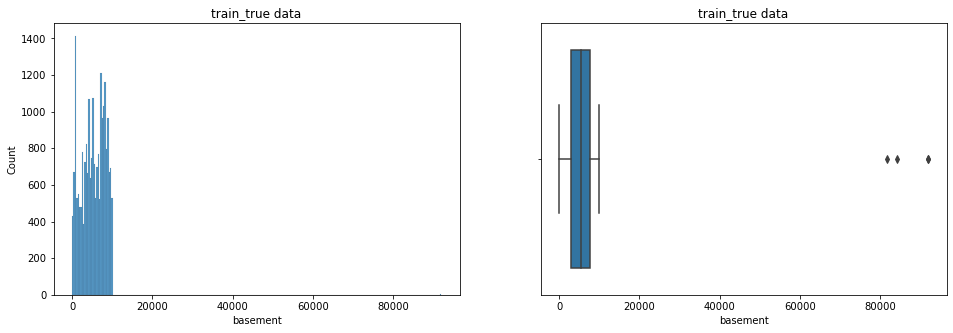

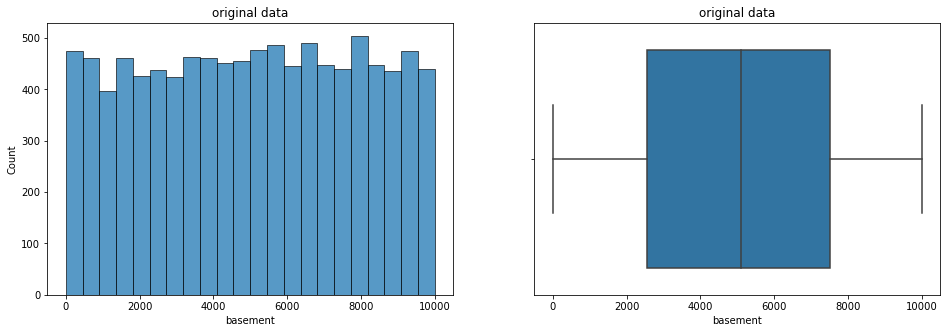

In [76]:
for data in train_true, original:
    column_stat(data, 'basement')

In [78]:
len(train_true[train_true['basement'] > 10000])

4

In [79]:
train_true = train_true[train_true['basement'] < 10001]

'train_true data'

count    22711.000000
mean      5268.394875
std       2844.719279
min          4.000000
25%       2976.000000
50%       5359.000000
75%       7745.000000
max      10000.000000
Name: basement, dtype: float64

'original data'

count    10000.000000
mean      5033.103900
std       2876.729545
min          0.000000
25%       2559.750000
50%       5092.500000
75%       7511.250000
max      10000.000000
Name: basement, dtype: float64

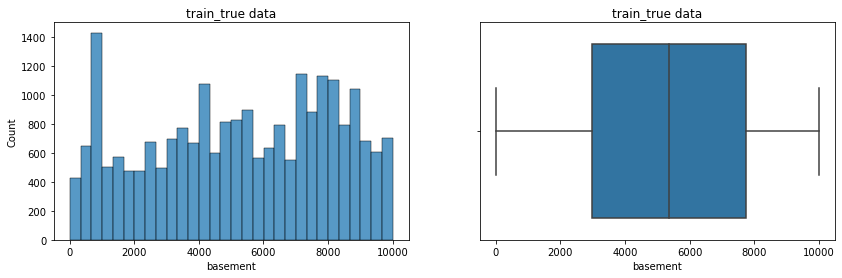

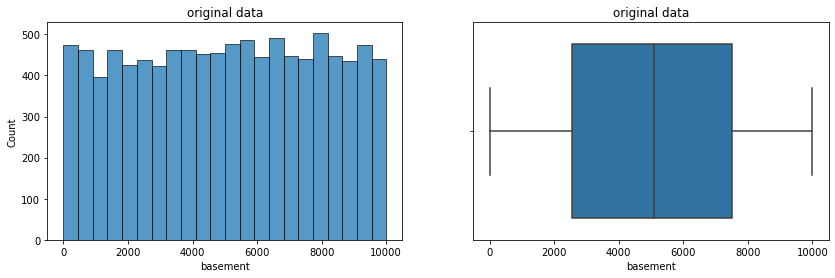

In [83]:
for data in train_true, original:
    column_stat(data, 'basement')

**Выводы по basement:**

* train убрали 4 выброса;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 10000; 
* min: 0; в train 4.

### attic

'train_true data'

count    22711.000000
mean      5067.053498
std       3097.157596
min          1.000000
25%       2599.000000
50%       4976.000000
75%       7652.000000
max      96381.000000
Name: attic, dtype: float64

'original data'

count    10000.00000
mean      5028.01060
std       2894.33221
min          1.00000
25%       2512.00000
50%       5045.00000
75%       7540.50000
max      10000.00000
Name: attic, dtype: float64

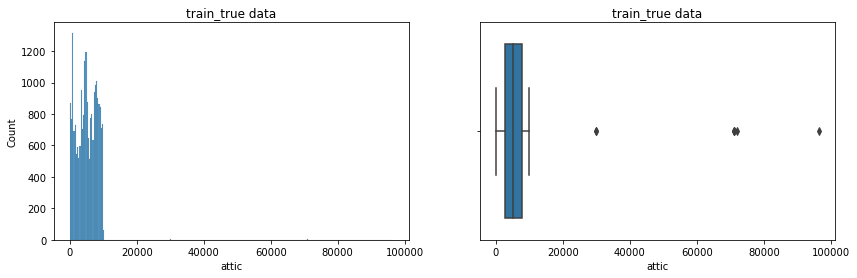

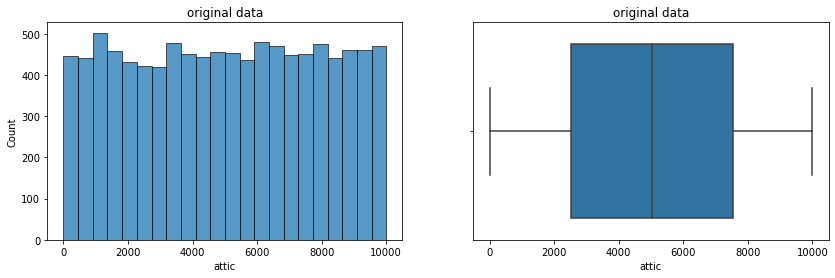

In [84]:
for data in train_true, original:
    column_stat(data, 'attic')

In [85]:
len(train_true[train_true['attic'] > 10000])

7

In [86]:
train_true = train_true[train_true['attic'] < 10001]

'train_true data'

count    22704.000000
mean      5049.175476
std       2898.494533
min          1.000000
25%       2596.000000
50%       4975.000000
75%       7651.000000
max      10000.000000
Name: attic, dtype: float64

'original data'

count    10000.00000
mean      5028.01060
std       2894.33221
min          1.00000
25%       2512.00000
50%       5045.00000
75%       7540.50000
max      10000.00000
Name: attic, dtype: float64

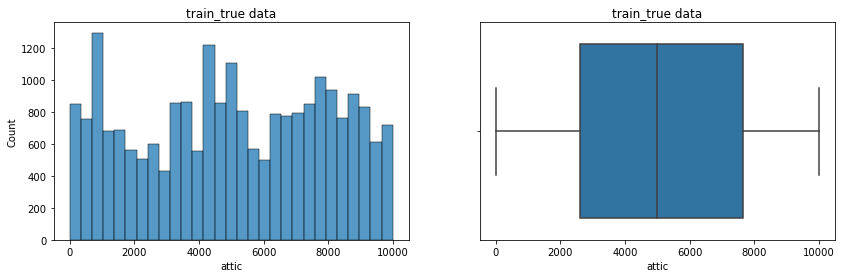

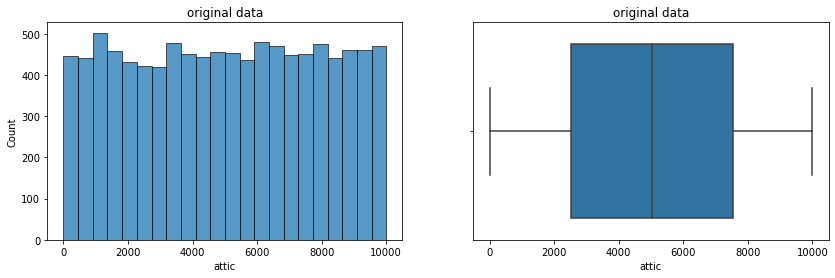

In [87]:
for data in train_true, original:
    column_stat(data, 'attic')

**Выводы по attic:**

* train убрали 7 выбросов;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 10000; 
* min: 1.

### garage

'train_true data'

count    22704.000000
mean       530.384294
std        274.822193
min          4.000000
25%        297.000000
50%        515.000000
75%        766.250000
max       9017.000000
Name: garage, dtype: float64

'original data'

count    10000.00000
mean       553.12120
std        262.05017
min        100.00000
25%        327.75000
50%        554.00000
75%        777.25000
max       1000.00000
Name: garage, dtype: float64

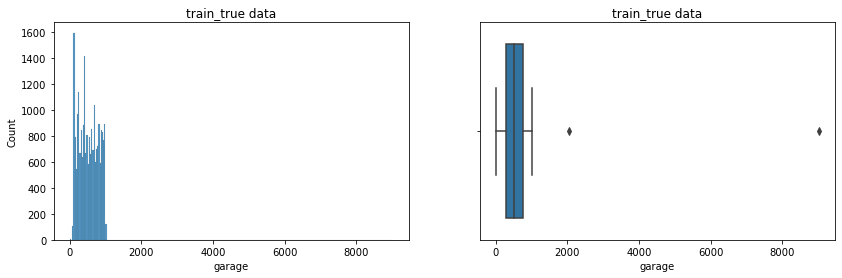

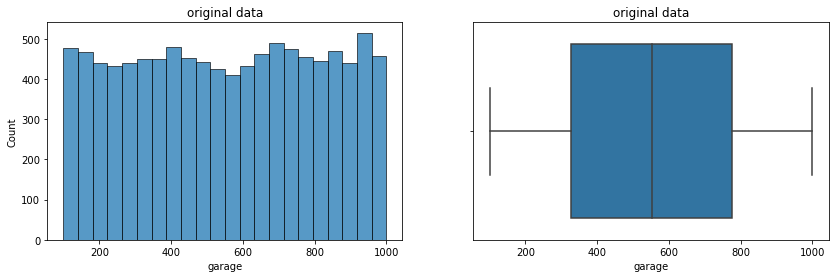

In [110]:
for data in train_true, original:
    column_stat(data, 'garage')

In [112]:
len(train_true[train_true['garage'] > 1000])

2

In [113]:
train_true = train_true[train_true['garage'] < 1001]

'train_true data'

count    22702.000000
mean       529.943617
std        268.811416
min          4.000000
25%        297.000000
50%        515.000000
75%        766.000000
max       1000.000000
Name: garage, dtype: float64

'original data'

count    10000.00000
mean       553.12120
std        262.05017
min        100.00000
25%        327.75000
50%        554.00000
75%        777.25000
max       1000.00000
Name: garage, dtype: float64

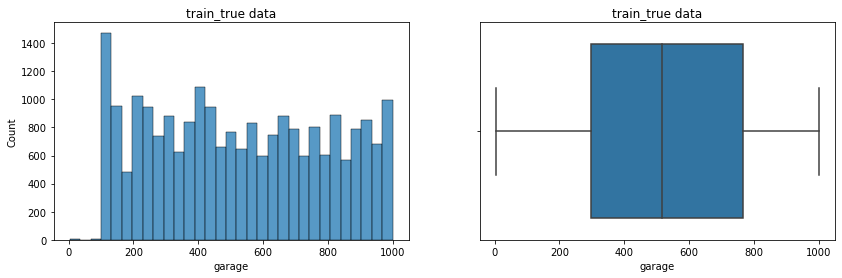

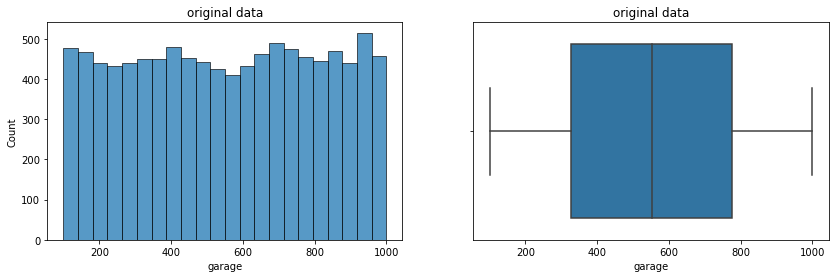

In [114]:
for data in train_true, original:
    column_stat(data, 'garage')

Есть еще аномалии в виде малых значений.

In [116]:
len(train_true[train_true['garage'] < 100])

3

In [117]:
train_true = train_true[train_true['garage'] > 99]

'train_true data'

count    22699.000000
mean       530.012952
std        268.761506
min        100.000000
25%        297.000000
50%        515.000000
75%        766.000000
max       1000.000000
Name: garage, dtype: float64

'original data'

count    10000.00000
mean       553.12120
std        262.05017
min        100.00000
25%        327.75000
50%        554.00000
75%        777.25000
max       1000.00000
Name: garage, dtype: float64

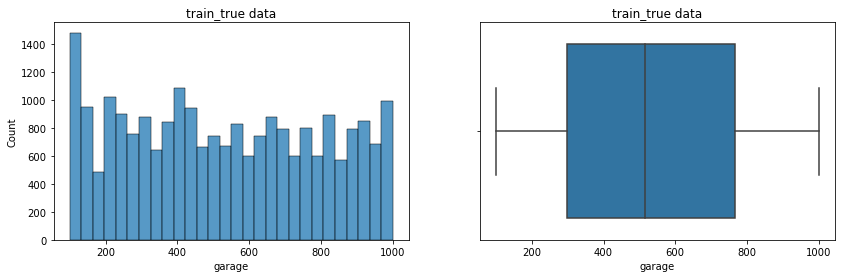

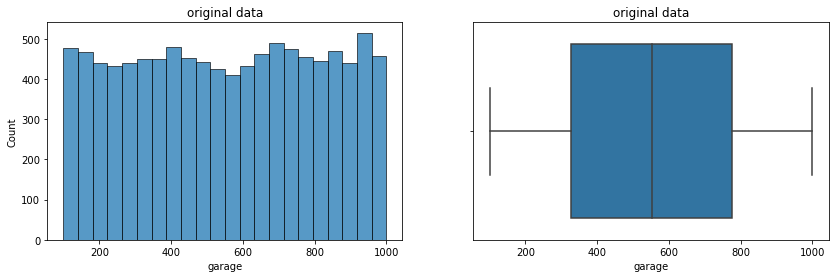

In [118]:
for data in train_true, original:
    column_stat(data, 'garage')

**Выводы по garage:**

* train убрали 5 выбросов/аномалий:
    * 2 по верхней границе;
    * 3 по нижней границе;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 1000; 
* min: 100.

### has_storage_room

In [89]:
for x in train_true, original:
    bool_col(x, column='has_storage_room')

Доля True в x: 0.46
Доля True в original: 0.5


**Выводы по has_storage_room:**

* Доля True в train_true: 0.46;
* Доля True в original: 0.5.

### has_guest_room

'train_true data'

count    22704.000000
mean         5.154466
std          3.055026
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: has_guest_room, dtype: float64

'original data'

count    10000.00000
mean         4.99460
std          3.17641
min          0.00000
25%          2.00000
50%          5.00000
75%          8.00000
max         10.00000
Name: has_guest_room, dtype: float64

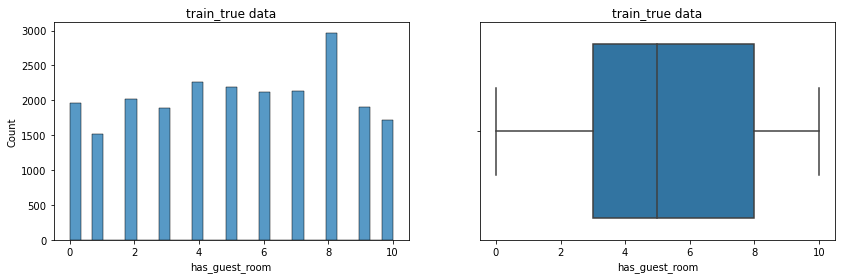

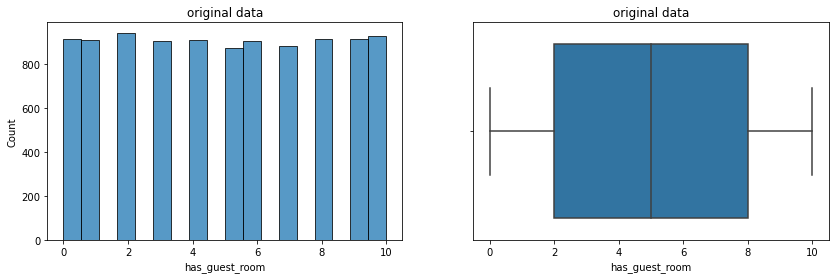

In [91]:
for data in train_true, original:
    column_stat(data, 'has_guest_room')

**Выводы по has_guest_room:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* train имеет большее количество значений 8;
* original имеет равномерное распределение;
* Медиана/среднее:
    * train: 5/5.15;
    * original: 5/5;
* max: 10;
* min: 0;
* train имеет более разнородную структуру данных.

### price

'train_true data'

count    2.270400e+04
mean     4.634035e+06
std      2.925691e+06
min      1.031350e+04
25%      2.041030e+06
50%      4.450823e+06
75%      7.159920e+06
max      1.000428e+07
Name: price, dtype: float64

'original data'

count    1.000000e+04
mean     4.993448e+06
std      2.877424e+06
min      1.031350e+04
25%      2.516402e+06
50%      5.016180e+06
75%      7.469092e+06
max      1.000677e+07
Name: price, dtype: float64

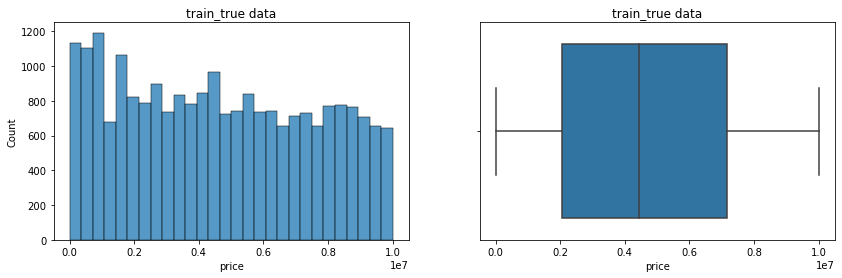

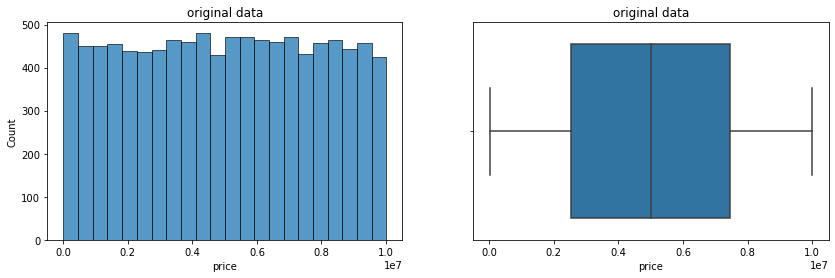

In [92]:
for data in train_true, original:
    column_stat(data, 'price')

**Выводы по price:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала и имеет некую схожесть с распределением Пирсона;
* original имеет равномерное распределение;
* Медиана/среднее:
    * train: 4450000/4634000;
    * original: 5016000/4493000;
* max: ~10000000;
* min: ~10000;
* train имеет более разнородную структуру данных.

### test label

Мы убрали выбросы в train датасете. Посмотрим подобные аномалии в test данных.

'train_true data'

count    22704.000000
mean     46311.813029
std      29244.414721
min         89.000000
25%      20392.000000
50%      44484.000000
75%      71541.000000
max      99985.000000
Name: square_meters, dtype: float64

'test data'

count    15154.000000
mean     45729.407681
std      29200.142520
min         69.000000
25%      19189.000000
50%      43802.000000
75%      70898.000000
max      99999.000000
Name: square_meters, dtype: float64

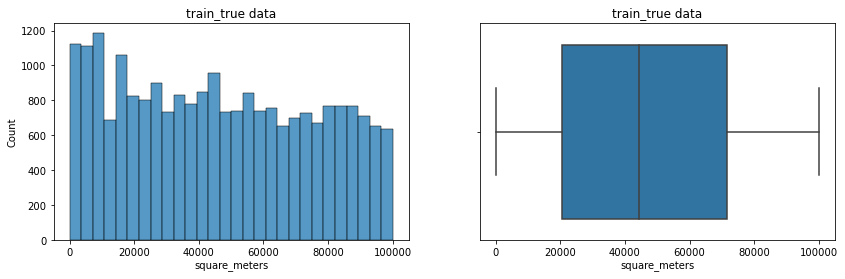

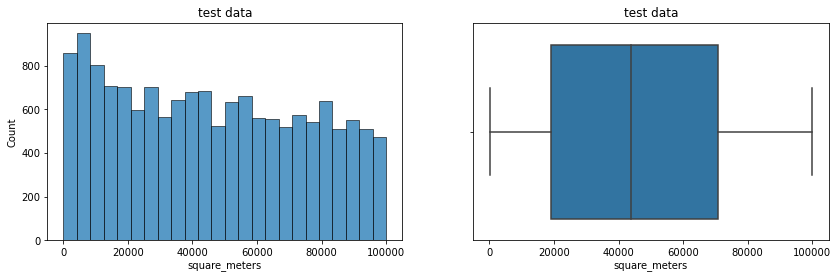

In [94]:
for data in train_true, test:
    column_stat(data, 'square_meters')

square_meters:

* данные схожи по структуре;
* аномалий нет.

'train_true data'

count    22704.000000
mean        48.232514
std         28.229020
min          1.000000
25%         25.000000
50%         47.000000
75%         75.000000
max        100.000000
Name: number_of_rooms, dtype: float64

'test data'

count    15154.000000
mean        47.874951
std         28.164077
min          1.000000
25%         25.000000
50%         46.000000
75%         75.000000
max        100.000000
Name: number_of_rooms, dtype: float64

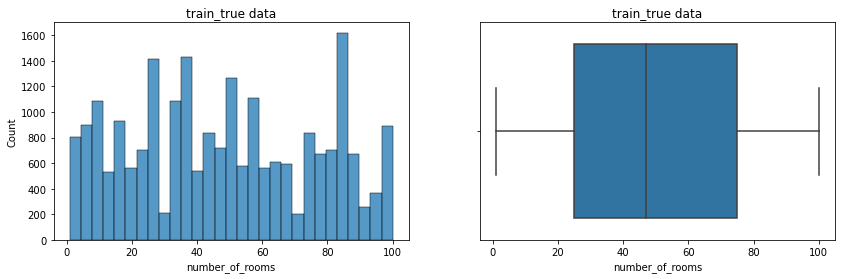

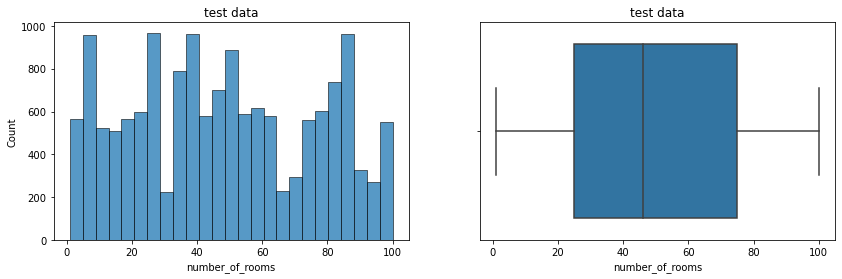

In [95]:
for data in train_true, test:
    column_stat(data, 'number_of_rooms')

number_of_rooms:

* данные схожи по структуре;
* аномалий нет.

'train_true data'

count    22704.000000
mean        47.039244
std         26.900172
min          1.000000
25%         25.000000
50%         45.000000
75%         69.000000
max        100.000000
Name: floors, dtype: float64

'test data'

count    15154.000000
mean        46.401148
std         27.000547
min          1.000000
25%         25.000000
50%         44.000000
75%         69.000000
max        100.000000
Name: floors, dtype: float64

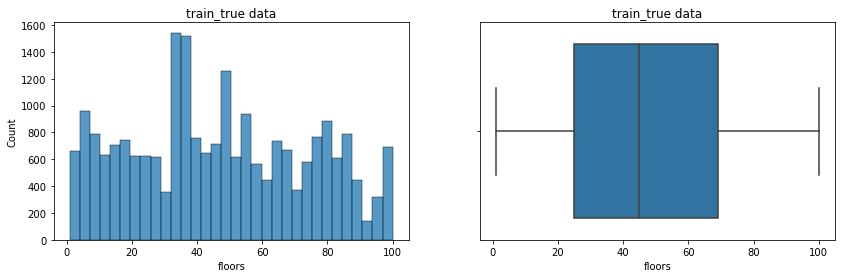

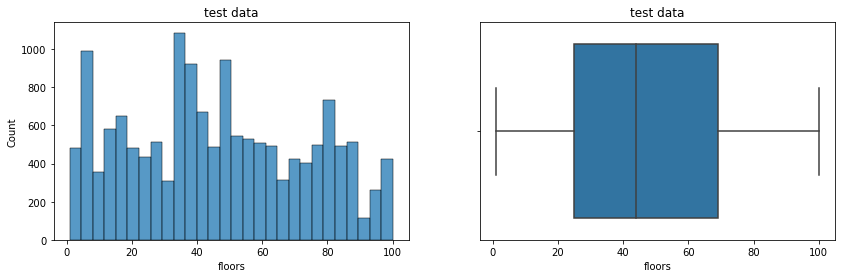

In [96]:
for data in train_true, test:
    column_stat(data, 'floors')

floors:

* данные схожи по структуре;
* аномалий нет.

'train_true data'

count    22704.000000
mean     49945.260923
std      29668.143936
min          3.000000
25%      22936.000000
50%      50409.000000
75%      76290.000000
max      99953.000000
Name: city_code, dtype: float64

'test data'

count     15154.000000
mean      50185.582750
std       31227.690126
min           3.000000
25%       23141.000000
50%       50693.000000
75%       76264.000000
max      977950.000000
Name: city_code, dtype: float64

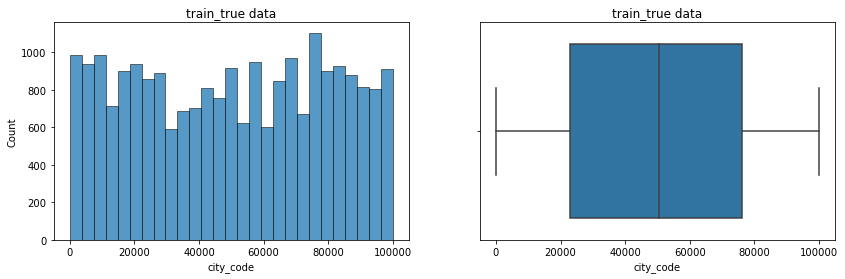

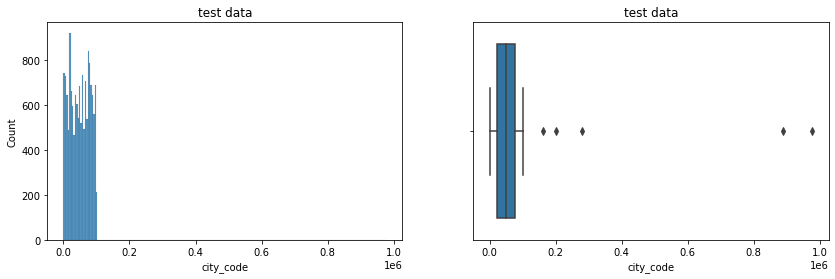

In [97]:
for data in train_true, test:
    column_stat(data, 'city_code')

'train_true data'

count    22704.000000
mean     49945.260923
std      29668.143936
min          3.000000
25%      22936.000000
50%      50409.000000
75%      76290.000000
max      99953.000000
Name: city_code, dtype: float64

'data data'

count    15149.000000
mean     50036.486699
std      29433.461260
min          3.000000
25%      23139.000000
50%      50693.000000
75%      76257.000000
max      99999.000000
Name: city_code, dtype: float64

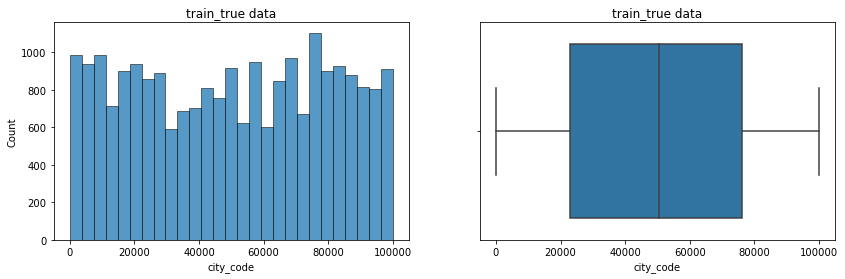

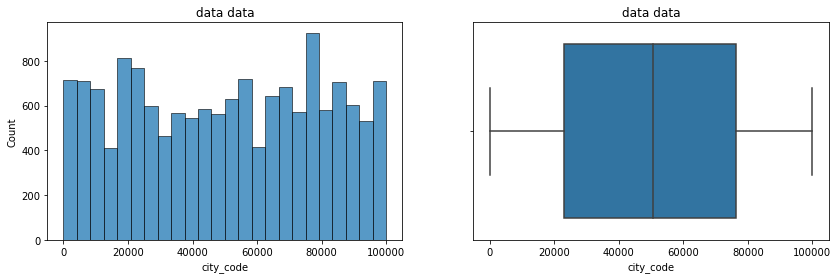

In [99]:
for data in train_true, test[test['city_code'] < 100001]:
    column_stat(data, 'city_code')

In [100]:
len(test[test['city_code'] > 100000])

5

city_code:

* данные схожи по структуре;
* выбросы есть в количестве 5:
    * `test['city_code'] > 100000`

'train_true data'

count    22704.000000
mean         5.583818
std          2.740012
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: city_part_range, dtype: float64

'test data'

count    15154.000000
mean         5.616933
std          2.727914
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: city_part_range, dtype: float64

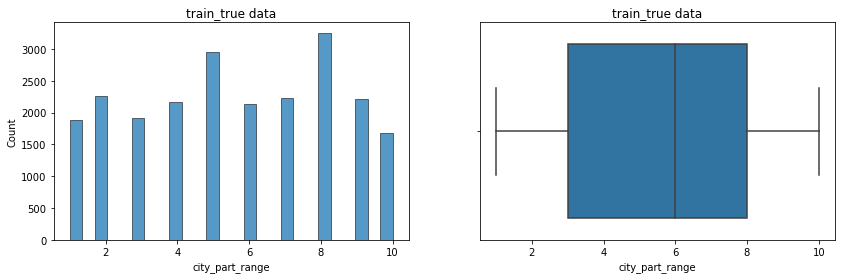

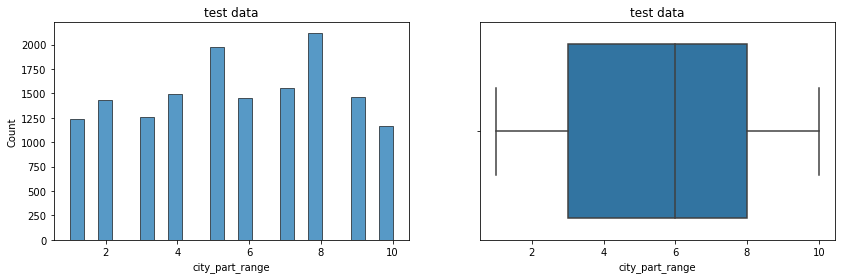

In [101]:
for data in train_true, test:
    column_stat(data, 'city_part_range')

city_part_range:

* данные схожи по структуре;
* выбросов нет.

'train_true data'

count    22704.000000
mean         5.620067
std          2.713375
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: num_prev_owners, dtype: float64

'test data'

count    15154.000000
mean         5.602547
std          2.718316
min          1.000000
25%          3.000000
50%          6.000000
75%          8.000000
max         10.000000
Name: num_prev_owners, dtype: float64

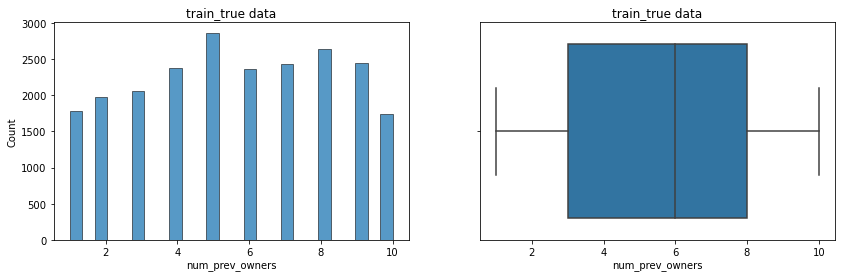

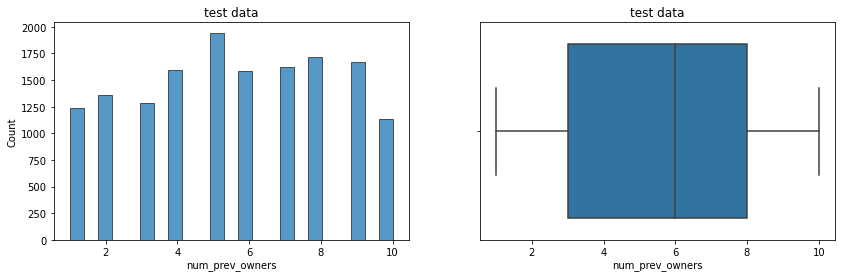

In [102]:
for data in train_true, test:
    column_stat(data, 'num_prev_owners')

num_prev_owners:

* данные схожи по структуре;
* выбросов нет.

'train_true data'

count    22704.000000
mean      2006.245772
std          8.122191
min       1990.000000
25%       2000.000000
50%       2006.000000
75%       2014.000000
max       2021.000000
Name: made, dtype: float64

'test data'

count    15154.000000
mean      2006.225485
std          8.156347
min       1990.000000
25%       2000.000000
50%       2006.000000
75%       2014.000000
max       2021.000000
Name: made, dtype: float64

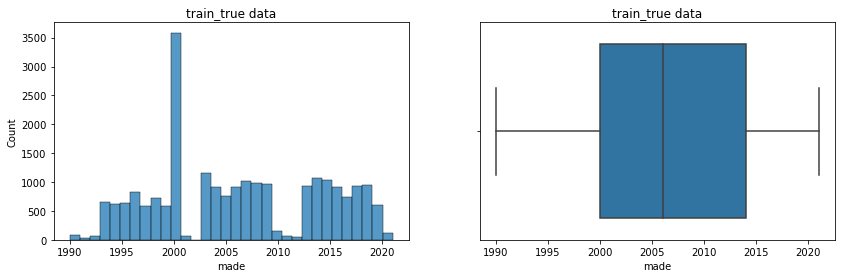

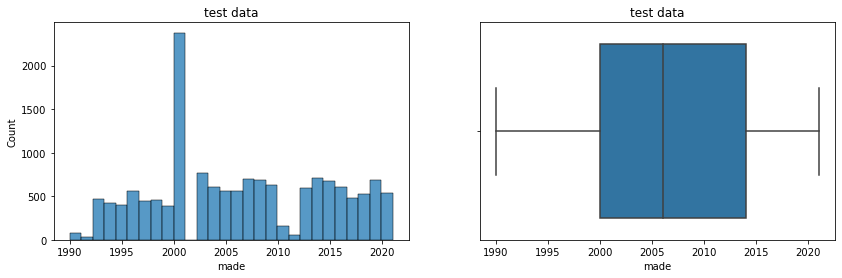

In [103]:
for data in train_true, test:
    column_stat(data, 'made')

made:

* данные схожи по структуре;
* выбросов нет.

'train_true data'

count    22704.000000
mean      5268.621080
std       2844.405695
min          4.000000
25%       2976.000000
50%       5359.000000
75%       7745.000000
max      10000.000000
Name: basement, dtype: float64

'test data'

count    15154.000000
mean      5299.415468
std       2980.156234
min          8.000000
25%       3114.000000
50%       5359.000000
75%       7739.000000
max      89016.000000
Name: basement, dtype: float64

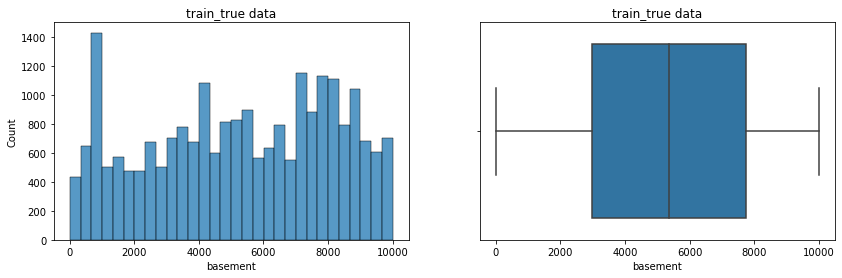

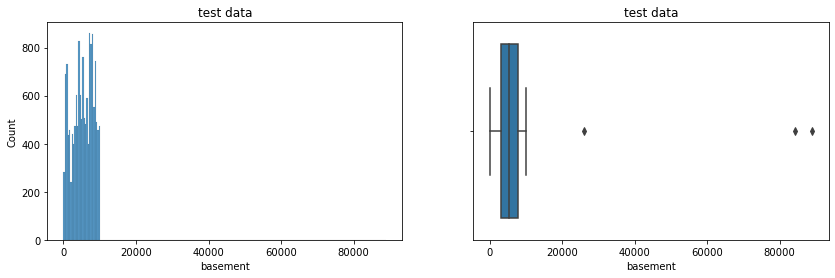

In [104]:
for data in train_true, test:
    column_stat(data, 'basement')

'train_true data'

count    22704.000000
mean      5268.621080
std       2844.405695
min          4.000000
25%       2976.000000
50%       5359.000000
75%       7745.000000
max      10000.000000
Name: basement, dtype: float64

'data data'

count    15151.000000
mean      5287.298594
std       2824.782083
min          8.000000
25%       3114.000000
50%       5359.000000
75%       7739.000000
max      10000.000000
Name: basement, dtype: float64

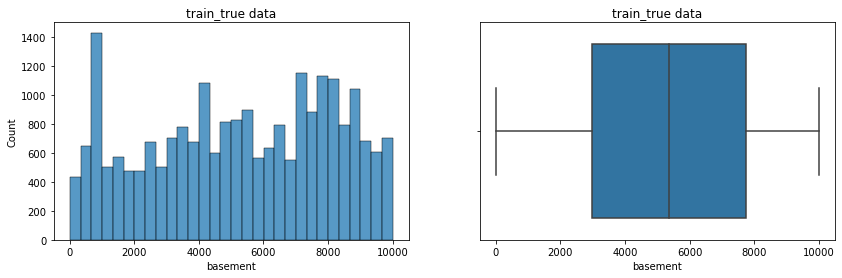

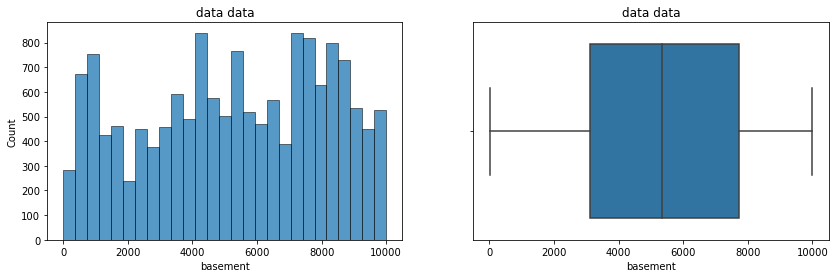

In [106]:
for data in train_true, test[test['basement'] < 10001]:
    column_stat(data, 'basement')

In [105]:
len(test[test['basement'] > 10000])

3

basement:

* данные схожи по структуре;
* есть 3 выброса:
    * `test['basement'] > 10000`

'train_true data'

count    22704.000000
mean      5049.175476
std       2898.494533
min          1.000000
25%       2596.000000
50%       4975.000000
75%       7651.000000
max      10000.000000
Name: attic, dtype: float64

'test data'

count    15154.000000
mean      5057.506599
std       2928.004147
min          1.000000
25%       2567.000000
50%       5017.000000
75%       7650.750000
max      38535.000000
Name: attic, dtype: float64

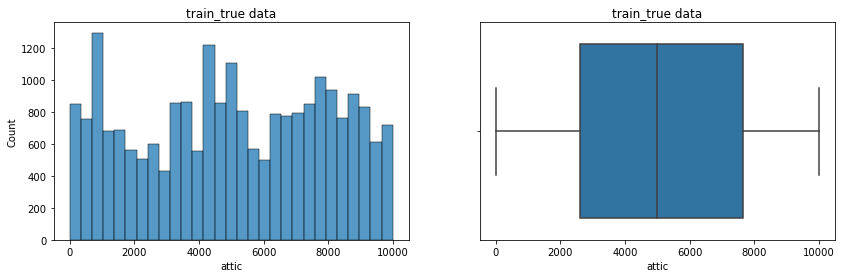

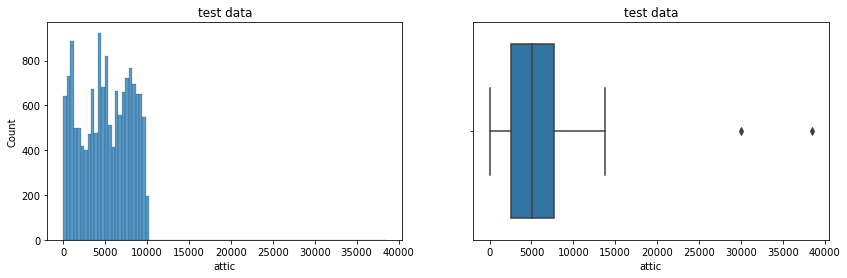

In [107]:
for data in train_true, test:
    column_stat(data, 'attic')

'train_true data'

count    22704.000000
mean      5049.175476
std       2898.494533
min          1.000000
25%       2596.000000
50%       4975.000000
75%       7651.000000
max      10000.000000
Name: attic, dtype: float64

'data data'

count    15151.000000
mean      5053.075111
std       2907.718108
min          1.000000
25%       2565.000000
50%       5017.000000
75%       7649.000000
max      10000.000000
Name: attic, dtype: float64

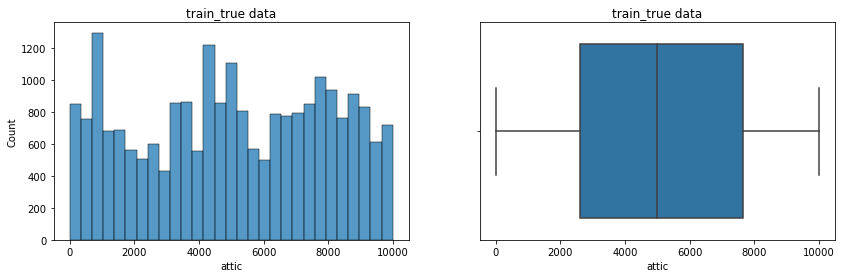

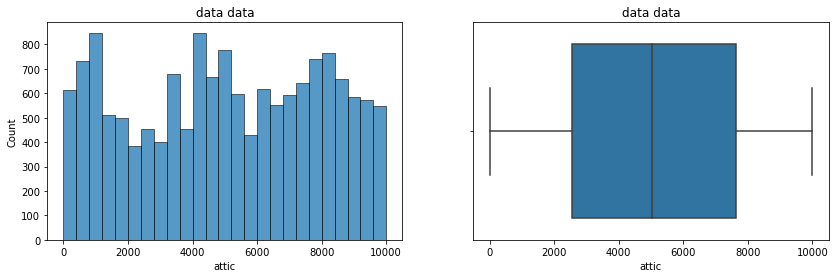

In [108]:
for data in train_true, test[test['attic'] < 10001]:
    column_stat(data, 'attic')

In [109]:
len(test[test['attic'] > 10000])

3

attic:

* данные схожи по структуре;
* есть 3 выброса:
    * `test['attic'] > 10000`

'train_true data'

count    22699.000000
mean       530.012952
std        268.761506
min        100.000000
25%        297.000000
50%        515.000000
75%        766.000000
max       1000.000000
Name: garage, dtype: float64

'test data'

count    15154.000000
mean       525.091065
std        268.504745
min          8.000000
25%        294.250000
50%        501.000000
75%        757.000000
max       1000.000000
Name: garage, dtype: float64

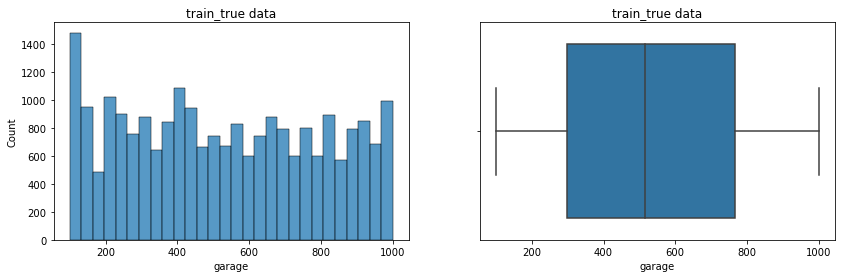

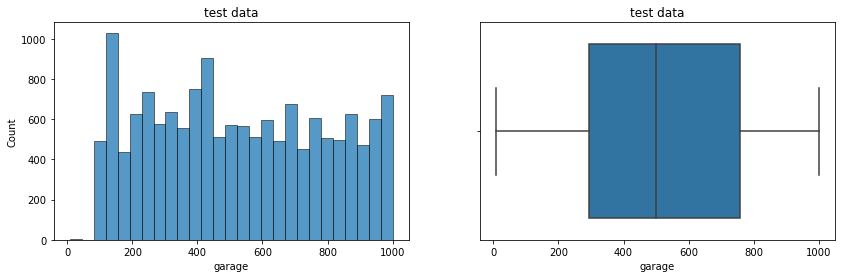

In [119]:
for data in train_true, test:
    column_stat(data, 'garage')

In [120]:
len(test[test['garage'] < 100])

2

'train_true data'

count    22699.000000
mean       530.012952
std        268.761506
min        100.000000
25%        297.000000
50%        515.000000
75%        766.000000
max       1000.000000
Name: garage, dtype: float64

'data data'

count    15152.000000
mean       525.159319
std        268.456727
min        100.000000
25%        295.000000
50%        501.000000
75%        757.000000
max       1000.000000
Name: garage, dtype: float64

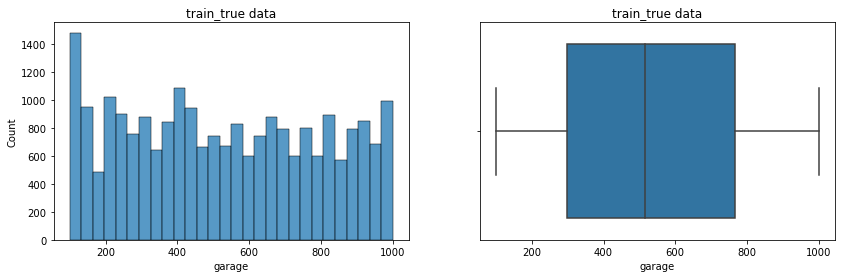

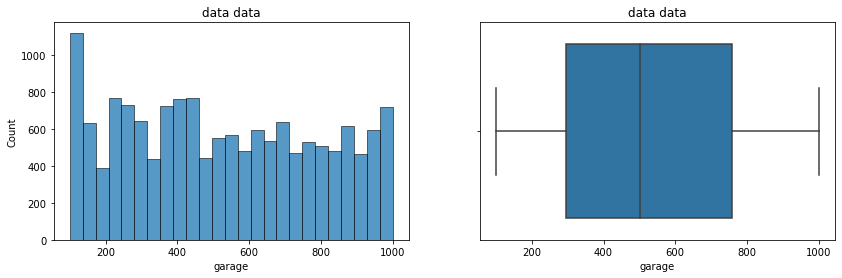

In [121]:
for data in train_true, test[test['garage'] > 99]:
    column_stat(data, 'garage')

garage:

* данные схожи по структуре;
* есть 2 выброса по нижней границе:
    * `test['garage'] < 100`

'train_true data'

count    22699.000000
mean         5.154985
std          3.055114
min          0.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: has_guest_room, dtype: float64

'test data'

count    15154.000000
mean         5.095618
std          3.049174
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         10.000000
Name: has_guest_room, dtype: float64

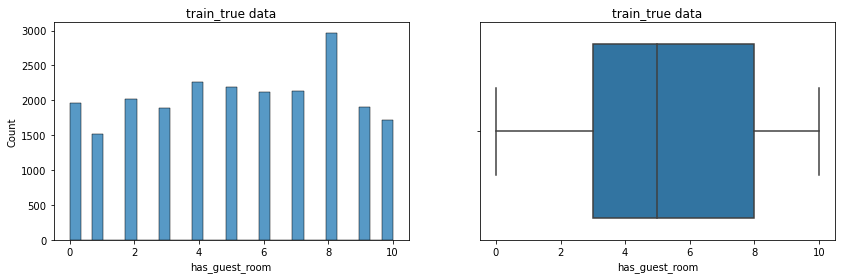

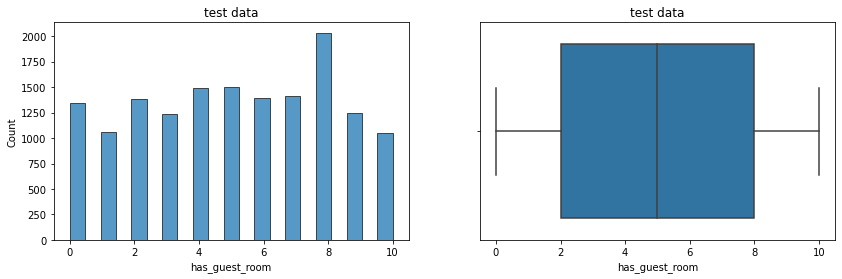

In [122]:
for data in train_true, test:
    column_stat(data, 'has_guest_room')

has_guest_room:

* данные схожи по структуре;
* аномалий нет.

### Финальные вычисления

In [ ]:
print('Количество аномалий в test данных:',
    len(test[test['city_code'] > 100000]) + 
    len(test[test['basement'] > 10000]) + 
    len(test[test['attic'] > 10000]) + 
    len(test[test['garage'] < 100])
)

Количество аномалий в test данных: 13


In [128]:
print(' Длина train данных:',
    len(train), '\n',
    'Длина train_true данных:',
    len(train_true), '\n',
    'Процент потерь данных:',
    round((100 - (len(train_true) / len(train)) * 100), 2), 
    '%'
)

 Длина train данных: 22730 
 Длина train_true данных: 22699 
 Процент потерь данных: 0.14 %


In [129]:
print(' Длина test данных:',
    len(test) )

 Длина test данных: 15154


In [131]:
print(' Длина original данных:',
    len(original) )

 Длина original данных: 10000


### Общие выводы EDA

**Выводы по столбцам train/original**

**square_meters:**

* Удалили 2 выброса;
* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:: 
    * train: 44484/46316;
    * original: 50105.5/49870;
* max: 99999; 
* min: 89;
* original имеет равномерное распределение;
* train имеет большее количество значений до 20000, больше походит на распределение Пуассона.


**number_of_rooms:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:
    * train: 47/48.24;
    * original: 50/50.35;
* max: 100;
* min: 1;
* original имеет равномерное распределение;
* train имеет более разнородную структуру данных.


**has_yard:**

* Доля True в train_true: 0.48;
* Доля True в original: 0.51.


**has_pool:**

* Доля True в train_true: 0.45;
* Доля True в original: 0.5.


**floors:**

* Удалили 1 выброс;
* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* Медиана/среднее:: 
    * train: 45/47;
    * original: 50/50.3;
* max: 100; 
* min: 1;
* original имеет равномерное распределение;
* train имеет более разнородную структуру данных.


**city_code:**

* Удалили 7 выбросов;
* Датасеты приблизительно равны;
* max: 99953; 
* min: 3.


**city_part_range:**

* train имеет большее количество значений 5 и 8;
* original имеет равномерное распределение;
* max: 10; 
* min: 1;
* Медиана/среднее:
    * train: 6/5.6;
    * original: 5/5.5;
* train слегка скошен влево;
* original слегка скошен вправо.


**num_prev_owners:**

* train имеет большее количество значений 5, меньшее 1 и 10;
* original имеет равномерное распределение;
* max: 10; 
* min: 1;
* Медиана:
    * train: 6;
    * original: 5.


**made:**

* Удалили 5 выбросов;
* train имеют большее количество значений 2000;
* max: 2021; 
* min: 1990;


**is_new_built:**

* Доля True в train_true: 0.47;
* Доля True в original: 0.5.


**has_storm_protector:**

* Доля True в train_true: 0.46;
* Доля True в original: 0.5.


**basement:**

* train убрали 4 выброса;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 10000; 
* min: 0; в train 4.


**attic:**

* train убрали 7 выбросов;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 10000; 
* min: 1.


**garage:**

* train убрали 5 выбросов/аномалий:
    * 2 по верхней границе;
    * 3 по нижней границе;
* train имеет большую разнородность данных;
* Распределение равномерное;
* max: 1000; 
* min: 100.


**has_storage_room:**

* Доля True в train_true: 0.46;
* Доля True в original: 0.5.


**has_guest_room:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала;
* train имеет большее количество значений 8;
* original имеет равномерное распределение;
* Медиана/среднее:
    * train: 5/5.15;
    * original: 5/5;
* max: 10;
* min: 0;
* train имеет более разнородную структуру данных.


**price:**

* Сгенерированный датасет имеет слегка скошенные данные вправо относительно ориганала и имеет некую схожесть с распределением Пирсона;
* original имеет равномерное распределение;
* Медиана/среднее:
    * train: 4450000/4634000;
    * original: 5016000/4493000;
* max: ~10000000;
* min: ~10000;
* train имеет более разнородную структуру данных.

**Выводы по test label**

**square_meters:**

* данные схожи по структуре;
* аномалий нет.


**number_of_rooms:**

* данные схожи по структуре;
* аномалий нет.


**floors:**

* данные схожи по структуре;
* аномалий нет.


**city_code:**

* данные схожи по структуре;
* выбросы есть в количестве 5:
    * `test['city_code'] > 100000`


**city_part_range:**

* данные схожи по структуре;
* выбросов нет.


**num_prev_owners:**

* данные схожи по структуре;
* выбросов нет.


**made:**

* данные схожи по структуре;
* выбросов нет.


**basement:**

* данные схожи по структуре;
* есть 3 выброса:
    * `test['basement'] > 10000`


**attic:**

* данные схожи по структуре;
* есть 3 выброса:
    * `test['attic'] > 10000`


**garage:**

* данные схожи по структуре;
* есть 2 выброса по нижней границе:
    * `test['garage'] < 100`


**has_guest_room:**

* данные схожи по структуре;
* аномалий нет.

#### Выводы по EDA

* Есть 2 набора данных для обучения:
    * train с аномалиями;
    * train_ true без аномалий;
* test данные имеют 13 аномалий в:
    * `'city_code', 'basement', 'attic', 'garage'`;
* original данные имеют равномерно распределенные данные по сравнению с исскуственно сгенерированными;
* Процент потерь данных: 0.14 %:
    * Длина train данных: 22730;
    * Длина train_true данных: 22699;
* Длина test данных: 15154;
* Длина original данных: 10000.

## Action plan

0. Базово обучить модель и выбрать лучший вариант:
    * train;
    * train_true;
    * train + original;
    * train_true + original;
0. Будем использовать разыные модели;
0. Submissions are scored on the root mean squared error (RMSE);
0. Изучить признаки на влияние модели и поработать с ними в поиске улучшения метрики;
0. Провести различные тесты над данными.